In [5]:
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

Sử dụng phương pháp phân tập khách hàng: Lần đặt hàng gần đây(Recency) - Tần suất(Frequency) - Giá trị tiền tệ(Monetary). Nghĩa là sẽ chia khách hàng thành các nhóm dựa trên những điều sau:
- Recency: Hành vi xem phim trên rạp chiếu phim của khách hàng dựa trên ngày xem phim gần đây nhất của họ và số ngày họ không hoạt động kể từ lần xem cuối cùng.
- Frequency: Hành vi mua vé xem của khách hàng dựa trên số lần họ mua vé xem phim từ rạp chiếu phim.
- Monetary Value/Revenue: Hành vi mua vé của khách hàng dựa trên doanh thu họ tạo ra.

In [6]:
df = pd.read_excel('./MAP_TICKET_AND_FILM_NEW.xlsx')
customer = pd.read_excel('./DATA SET - VÒNG 1 CUỘC THI DATA GOT TALENT 2023 CLEAN VER5.xlsx', sheet_name='customer')

Trong mô hình RFM của Movio, người xem phim được phân loại theo lần xem gần đây, tần suất và mức chi tiêu trung bình của họ. Sau đó, chúng được phân đoạn theo việc chúng nằm trên hay dưới giá trị trung bình cho mỗi thuộc tính.

Các mức trung bình được chọn cho mô hình này nhằm cung cấp số liệu ổn định, không biến động mà nhờ đó chúng tôi có thể nắm bắt được sự phát triển hành vi của thành viên trên tất cả các phân khúc. Các mức trung vị cũng đảm bảo sự phân bổ đồng đều lượng người xem phim trên tất cả tám phân khúc, mỗi phân khúc nắm bắt đặc điểm và hành vi của người xem phim một cách độc đáo.

Link tham khảo: https://vistagroup.co.nz/blog/rfm-the-triple-threat-designed-to-increase-high-value-moviegoers

In [7]:
df.columns

Index(['orderid', 'cashier', 'saledate', 'total', 'customerid', 'ticketcode',
       'date', 'time', 'slot', 'room', 'film', 'slot type', 'ticket type',
       'ticket price', 'popcorn', 'title_clean', 'show_id', 'title',
       'release_year', 'rating', 'duration', 'description', 'original_title',
       'production_companies', 'release_date', 'poster_path', 'revenue',
       'vote_average', 'vote_count', 'country', 'cast', 'genres', 'director'],
      dtype='object')

Ngày hiện tại sẽ lấy ngày cuối cùng có trong trường date ngày xem phim của khách hàng + 1

In [8]:
ctm_max_date = df.groupby(
    'customerid')['date'].max().reset_index()
ctm_max_date.columns = ['customerid', 'max_date']
ctm_max_date.head()

,customerid,max_date
0,0000000014,2019-05-06
1,0000000034,2019-05-30
2,0000000051,2019-05-22
3,0000000081,2019-05-05
4,0000000098,2019-05-25


In [9]:
# Find the recency in days
now = df.date.max() + datetime.timedelta(days=1)
ctm_max_date['Recency'] = (now - pd.to_datetime(ctm_max_date['max_date'])).dt.days

# Merge the dataframes ctm_dt and ctm_max_purchase[['Customer ID', 'Recency']] on the CustomerID column.
customer = pd.merge(
    customer, ctm_max_date[['customerid', 'Recency']], on='customerid')
customer.head()

,customerid,DOB,gender,address,Website,job,industry,Recency
0,0000000014,1970-01-01 10:04:28,Nữ,hoa khe quan thanh khe,KH0104|0345,student,computer,26
1,0000000034,1970-01-01 09:58:21,Nam,man thai,KH0104|0333,student,health service,2
2,0000000051,1970-01-01 09:31:59,Nam,que son quang nam,KH0104|0255,blue collar,economics,10
3,0000000081,1970-01-01 10:07:52,Nam,truong chinh,KH0104|0293,student,economics,27
4,0000000098,1970-01-01 09:36:48,Nam,cẩm lệ,KH0104|40580,blue collar,health service,7


In [10]:
ctm_frequency = df.drop_duplicates(subset='orderid').groupby('customerid')[
    'orderid'].count().reset_index()
ctm_frequency.columns = ['customerid', 'Frequency']

In [11]:
customer = pd.merge(customer, ctm_frequency, on='customerid')
customer.head()

,customerid,DOB,gender,address,Website,job,industry,Recency,Frequency
0,0000000014,1970-01-01 10:04:28,Nữ,hoa khe quan thanh khe,KH0104|0345,student,computer,26,1
1,0000000034,1970-01-01 09:58:21,Nam,man thai,KH0104|0333,student,health service,2,2
2,0000000051,1970-01-01 09:31:59,Nam,que son quang nam,KH0104|0255,blue collar,economics,10,1
3,0000000081,1970-01-01 10:07:52,Nam,truong chinh,KH0104|0293,student,economics,27,2
4,0000000098,1970-01-01 09:36:48,Nam,cẩm lệ,KH0104|40580,blue collar,health service,7,2


In [8]:
df.isnull().sum()

orderid                 1975
cashier                    0
saledate                1975
total                      0
customerid                 0
ticketcode                 0
date                       0
time                       0
slot                       0
room                       0
film                       0
slot type                  0
ticket type                0
ticket price               0
popcorn                    0
title_clean                0
show_id                    0
title                      0
release_year               0
rating                  6595
duration                   0
description                0
original_title             0
production_companies       0
release_date               0
poster_path                0
revenue                    0
vote_average               0
vote_count                 0
country                 6435
cast                       0
genres                     0
director                   0
dtype: int64

In [12]:
ctm_revenue = df.groupby('customerid').total.sum().reset_index()
ctm_revenue.columns = ['customerid', 'Monetary']
customer = pd.merge(customer, ctm_revenue, on='customerid')

In [10]:
customer.columns

Index(['customerid', 'DOB', 'gender', 'address', 'Website', 'job', 'industry',
       'Recency', 'Frequency', 'Monetary'],
      dtype='object')

In [13]:
customer.Recency.median()

15.0

In [14]:
customer.Frequency.median()

1.0

In [15]:
customer.Frequency.unique()

array([   1,    2,    3,    4,    6,    7,    5,    9, 2854,    0,    8,
        206,   14,   10,   19,   11,   18, 4043], dtype=int64)

In [16]:
customer.Monetary.median()

5400000.0

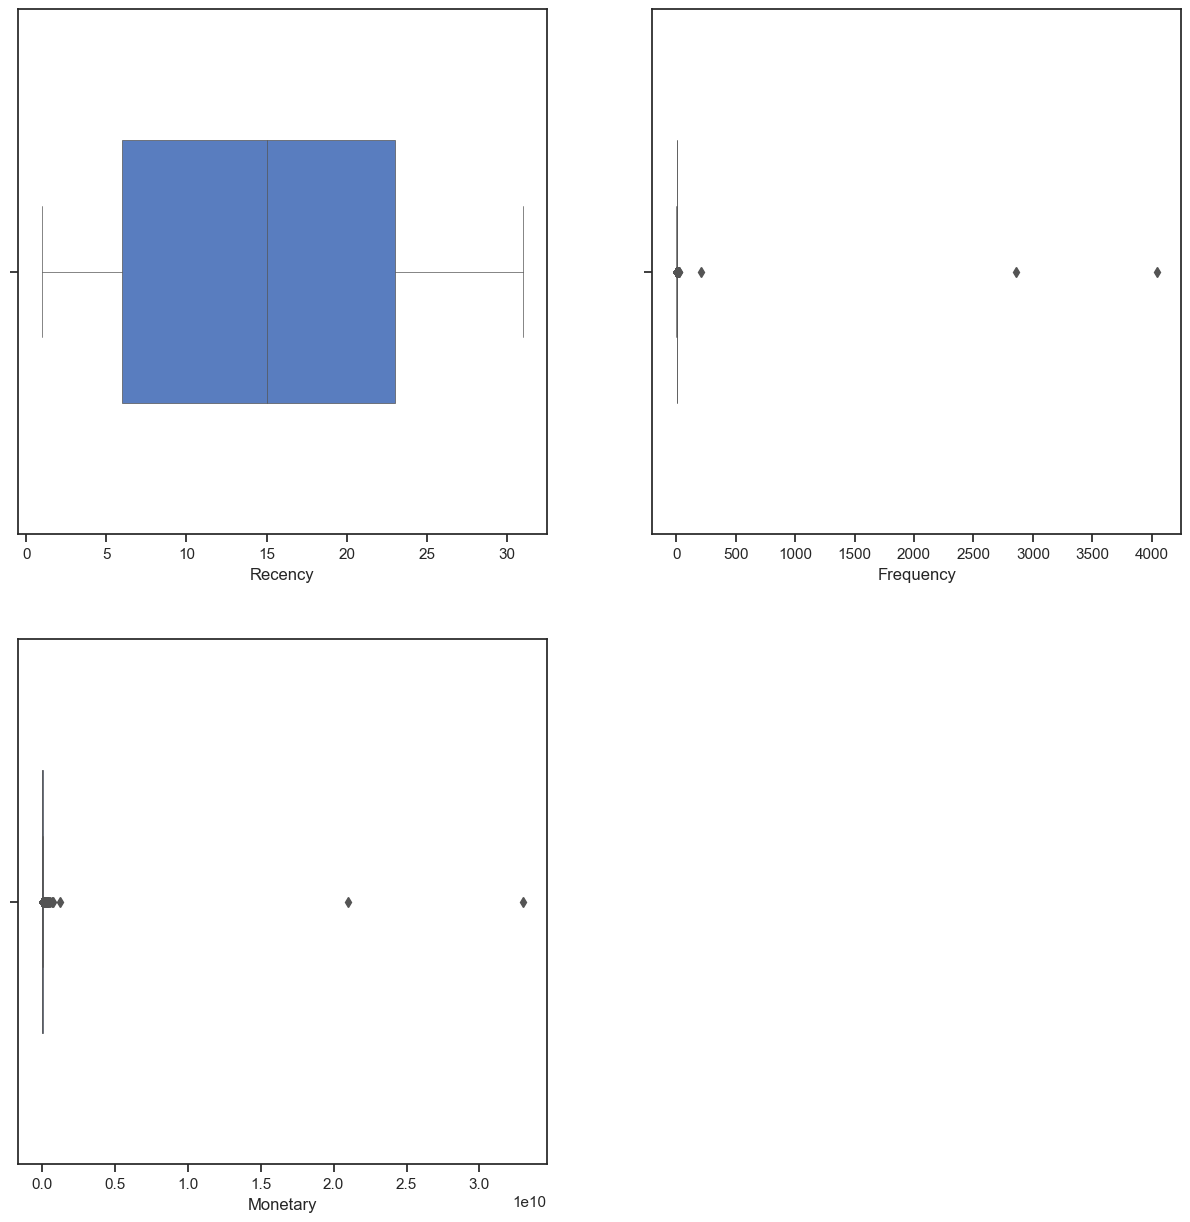

In [17]:
# Visualization box plot to see outlier values in numerical features
# columns = list(df.select_dtypes(include=['int', 'float']))
columns = ['Recency', 'Frequency', 'Monetary']
length = len(columns)
sns.set_theme(style="ticks")
# Draw box plot
fig = plt.figure(figsize=[15, 15])
for idx, col in zip(range(length+1), columns):
    ax = plt.subplot(2, 2, idx+1)
    # No need remove outlier in statistical part
    sns.boxplot(x=customer[col], width=.5, palette="muted", ax=ax, linewidth=.5)

In [18]:
#Remove outliner
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [19]:
customer_remove_outlier = remove_outlier(customer, 'Monetary')
customer_remove_outlier = remove_outlier(customer, 'Frequency')

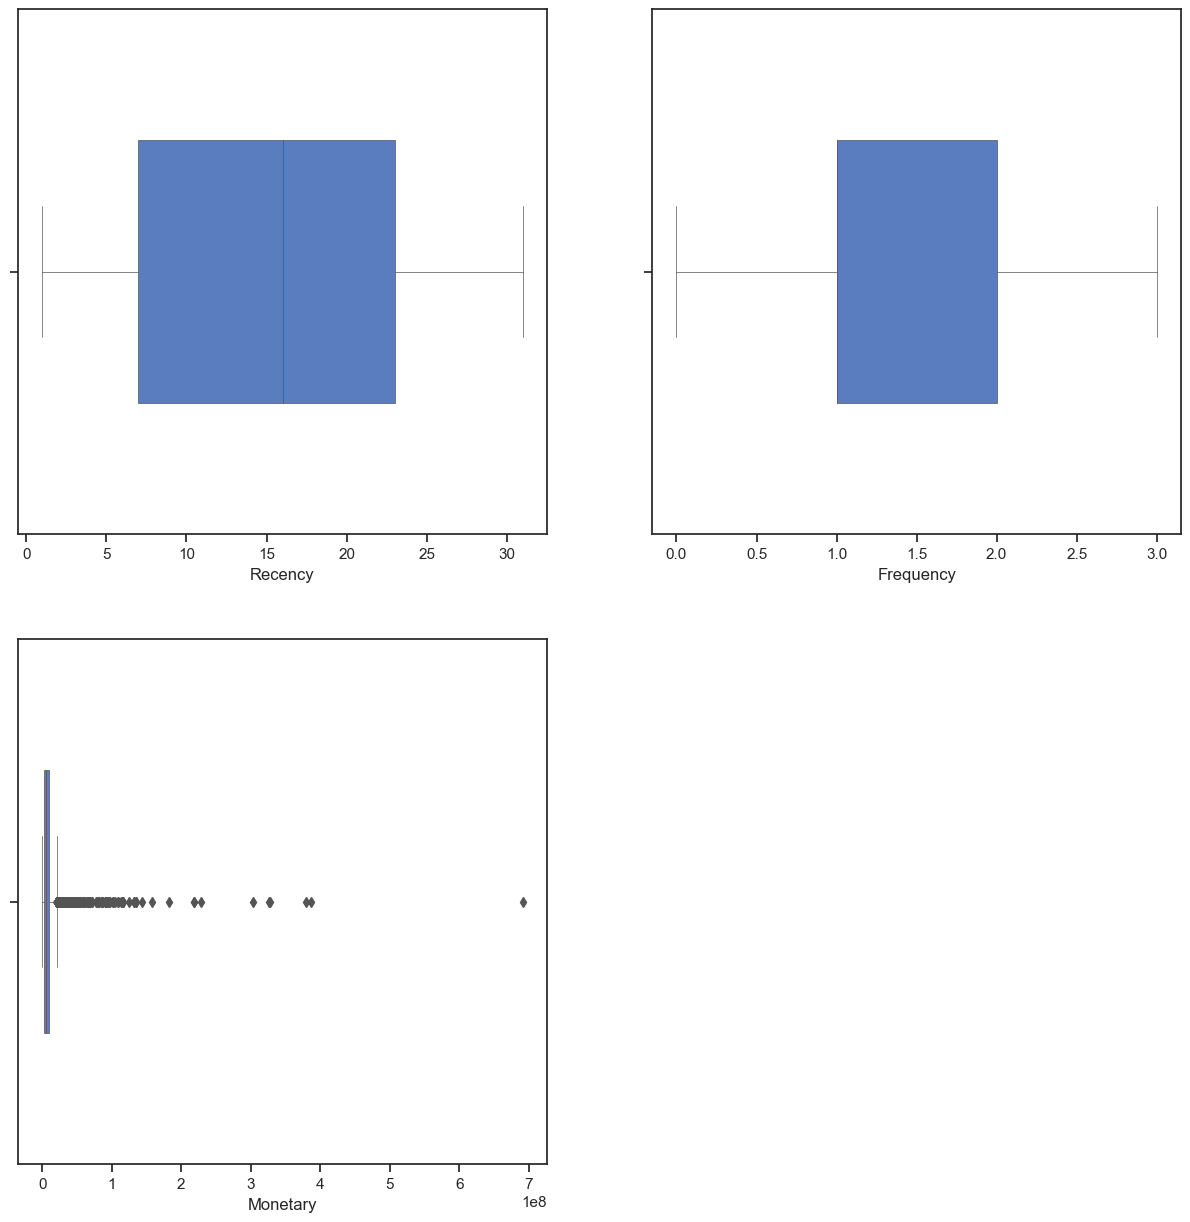

In [20]:
# Visualization box plot to see outlier values in numerical features
# columns = list(df.select_dtypes(include=['int', 'float']))
columns = ['Recency', 'Frequency', 'Monetary']
length = len(columns)
sns.set_theme(style="ticks")
# Draw box plot
fig = plt.figure(figsize=[15, 15])
for idx, col in zip(range(length+1), columns):
    ax = plt.subplot(2, 2, idx+1)
    # No need remove outlier in statistical part
    sns.boxplot(x=customer_remove_outlier[col], width=.5,
                palette="muted", ax=ax, linewidth=.5)

In [21]:
customer_remove_outlier.Frequency.median()

1.0

In [22]:
customer_remove_outlier.Monetary.median()

5400000.0

![image](./650931df94ebf3cb896011d3_RFM-TRIPLE-THREAT.png)

In [23]:
def customer_segment(df):
    for index, row in df.iterrows():
        if (row['Frequency'] > df.Frequency.median()) & (row['Recency'] <= df.Recency.median()) & (row['Monetary'] > df.Monetary.median()):
            df.at[index, 'customer_segmentation'] = 'Loyal moviegoers'
        elif (row['Frequency'] > df.Frequency.median()) & (row['Recency'] <= df.Recency.median()) & (row['Monetary'] <= df.Monetary.median()):
            df.at[index, 'customer_segmentation'] = 'Promising'
        elif (row['Frequency'] <= df.Frequency.median()) & (row['Recency'] <= df.Recency.median()) & (row['Monetary'] > df.Monetary.median()):
            df.at[index, 'customer_segmentation'] = 'Potential loyalist'
        elif (row['Frequency'] <= df.Frequency.median()) & (row['Recency'] <= df.Recency.median()) & (row['Monetary'] <= df.Monetary.median()):
            df.at[index, 'customer_segmentation'] = 'Recent customers'
        elif (row['Frequency'] > df.Frequency.median()) & (row['Recency'] > df.Recency.median()) & (row['Monetary'] > df.Monetary.median()):
            df.at[index, 'customer_segmentation'] = 'At risk'
        elif (row['Frequency'] > df.Frequency.median()) & (row['Recency'] > df.Recency.median()) & (row['Monetary'] <= df.Monetary.median()):
            df.at[index, 'customer_segmentation'] = 'About to sleep'
        elif (row['Frequency'] <= df.Frequency.median()) & (row['Recency'] > df.Recency.median()) & (row['Monetary'] > df.Monetary.median()):
            df.at[index, 'customer_segmentation'] = 'Needing attention'
        elif (row['Frequency'] <= df.Frequency.median()) & (row['Recency'] > df.Recency.median()) & (row['Monetary'] <= df.Monetary.median()):
            df.at[index, 'customer_segmentation'] = 'About to be lost'
    return df

In [24]:
customer_segment_df = customer_segment(customer)

In [25]:
customer.isnull().sum()

customerid                 0
DOB                        0
gender                     0
address                    0
Website                  509
job                        0
industry                   0
Recency                    0
Frequency                  0
Monetary                   0
customer_segmentation      0
dtype: int64

In [26]:
customer_segment_df

,customerid,DOB,gender,address,Website,job,industry,Recency,Frequency,Monetary,customer_segmentation
0,0000000014,1970-01-01 10:04:28,Nữ,hoa khe quan thanh khe,KH0104|0345,student,computer,26,1,5400000,About to be lost
1,0000000034,1970-01-01 09:58:21,Nam,man thai,KH0104|0333,student,health service,2,2,4500000,Promising
2,0000000051,1970-01-01 09:31:59,Nam,que son quang nam,KH0104|0255,blue collar,economics,10,1,2700000,Recent customers
3,0000000081,1970-01-01 10:07:52,Nam,truong chinh,KH0104|0293,student,economics,27,2,10800000,At risk
4,0000000098,1970-01-01 09:36:48,Nam,cẩm lệ,KH0104|40580,blue collar,health service,7,2,8100000,Loyal moviegoers
...,...,...,...,...,...,...,...,...,...,...,...
4447,KH9855766,1970-01-01 09:41:25,Nữ,"A, THUAN PHUOC,HAI CHAU, DA NANG",NaN,specialist,finance,1,3,9900000,Loyal moviegoers
4448,KH9958204,1970-01-01 10:14:52,Nữ,"Phước Mỹ, ĐN",NaN,teenager,no industry,7,1,4050000,Recent customers
4449,WEBS00000043900,1970-01-01 08:58:31,Nữ,nguyen gian thanh,KHWEBS|00006890,specialist,construction,23,2,2970000,About to sleep
4450,WEBS00000044909,1970-01-01 09:48:36,Nữ,ngũ hành sơn,KHWEBS|00007899,blue collar,finance,2,1,21600000,Potential loyalist


Dựa trên các chỉ số RFM mô hình sẽ được phân thành 8 nhóm khách hàng:
1. Loyal moviegoers - Những người xem phim trung thành: những người đã đến rạp gần đây, thường xuyên ghé thăm và chi tiêu nhiều.
2. At risk - Có nguy cơ: đây là những người xem phim thường xuyên đến rạp và chi tiêu rất nhiều nhưng gần đây chưa ghé thăm
3. Potential loyalist - Người trung thành tiềm năng: những người xem phim này gần đây đã đến rạp và chi tiêu rất nhiều nhưng không thực sự đi thường xuyên
4. Needing attention - Cần được chú ý: những người xem phim này chi tiêu rất nhiều mỗi lần họ đến rạp của bạn nhưng không làm điều đó thường xuyên và gần đây không đến xem
5. Promising - Đầy hứa hẹn: những người xem phim này gần đây đã đến rạp chiếu phim và tham dự thường xuyên nhưng không chi tiêu nhiều khi họ đến rạp
6. Recent customers - Khách hàng gần đây: những người xem phim này gần đây đã đến rạp nhưng không đến thường xuyên và không chi tiêu nhiều
7. About to sleep: đây là những khán giả thường xuyên đến rạp nhưng gần đây không đến xem và không chi tiêu nhiều
8. About to be lost: đây là những khán giả ít giá trị nhất, những người gần đây không đến rạp, không đến thường xuyên và cũng không chi tiêu nhiều

In [28]:
with pd.ExcelWriter('DATA SET - VÒNG 1 CUỘC THI DATA GOT TALENT 2023 CLEAN VER5.xlsx', mode='a') as writer:
    customer_segment_df.to_excel(writer, sheet_name='customer_with_rfm', index=False)